<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

* Este notebook contém trechos do livro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas; o conteúdo original, em inglês, está disponível [no GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

* O texto, aqui traduzido e modificado para ons fins da disciplina, é aberto, liberado sob a [licença CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode) e o código é liberado sob a [licença MIT](https://opensource.org/licenses/MIT).

* Se você achar esse conteúdo útil, considere apoiar o trabalho [comprando o livro](http://shop.oreilly.com/product/0636920034919.do)!

# Aula 5 - Machine Learning

# Demo 12 - Classificação via Naïve Bayes

Os modelos de Naïve Bayes são um grupo de algoritmos de classificação extremamente rápidos e simples que geralmente são adequados para conjuntos de dados de dimensões muito altas.

Por serem rápidos e terem poucos parâmetros ajustáveis acabam sendo muito úteis como um primeiro método se tentar para um problema de classificação (um resultado "baseline" para a comparação para com outros métodos).

A seguir há uma explicação intuitiva de como os classificadores Naïve Bayes funcionam, seguida por alguns exemplos em conjuntos de dados da literatura.

## Classificação Bayesiana

Os classificadores Naïve Bayes são construídos com base nos métodos de classificação bayesiana.

Estes se baseiam no teorema de Bayes, que é uma equação a qual descreve a relação de probabilidades condicionais de quantidades estatísticas.

Então, na classificação bayesiana, estamos interessados em encontrar a probabilidade de um rótulo, dadas algumas características observadas, que podemos escrever como $ P (L ~ | ~ {\rm atributos}) $.

O teorema de Bayes nos diz como expressar isso em termos de quantidades que podemos calcular mais diretamente:

$$
P(L~|~{\rm atributos}) = \frac{P({\rm atributos}~|~L)P(L)}{P({\rm atributos})}
$$

Se estamos tentando decidir entre dois rótulos - os quais vamos chamar de $ L_1 $ e $ L_2 $ -, então uma maneira de tomar essa decisão é calcular a proporção das probabilidades posteriores para cada rótulo:

$$
\frac{P(L_1~|~{\rm atributos})}{P(L_2~|~{\rm atributos})} = \frac{P({\rm atributos}~|~L_1)}{P({\rm atributos}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

Tudo o que precisamos agora é de um modelo pelo qual possamos calcular $ P ({\rm atributos} ~ | ~ L_i) $ para cada rótulo.Esse modelo é chamado de *modelo generativo* porque especifica o processo aleatório hipotético que gera os dados.A especificação desse modelo generativo para cada rótulo é a peça principal do treinamento de um classificador bayesiano.

A versão geral de uma etapa desse treinamento é uma tarefa muito difícil, mas podemos simplificá-la por meio do uso de algumas suposições simplificadoras sobre a forma desse modelo. É aqui que entra o "ingênuo" em "Naïve Bayes": se fizermos suposições muito ingênuas sobre o modelo generativo para cada rótulo, podemos encontrar uma aproximação aproximada do modelo generativo para cada classe e prosseguir com a classificação bayesiana.

Diferentes tipos de classificadores Naïve Bayes baseiam-se em diferentes suposições ingênuas sobre os dados, e examinaremos alguns deles nas seções a seguir.

Começamos pelos nossos imports padrão:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Naïve Bayes Gaussiano

Talvez o classificador Naïve Bayes de mais fácil entendimento seja o Naïve Bayes gaussiano. Nesse classificador a suposição é que *os dados de cada rótulo são extraídos de uma distribuição gaussiana simples*.

Imagine que você tem os seguintes dados:

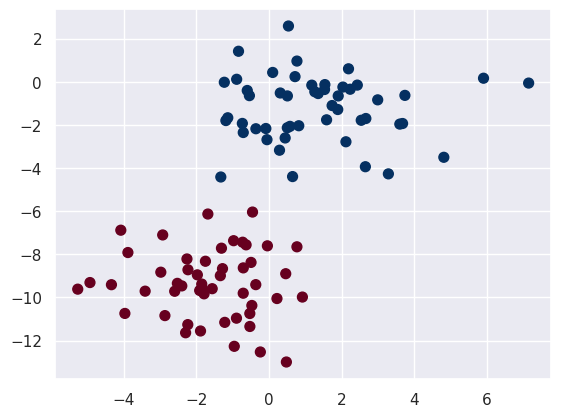

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Uma maneira extremamente rápida de criar um modelo simples é assumir que os dados são descritos por uma distribuição gaussiana sem covariância entre dimensões.Esse modelo pode ser ajustado simplesmente encontrando a média e o desvio padrão dos pontos em cada rótulo, o que é tudo o que você precisa para definir essa distribuição.

O resultado dessa ingênua suposição gaussiana é mostrado na figura a seguir:

![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.05-gaussian-NB.png?raw=1)
[](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

As elipses aqui representam o modelo generativo gaussiano para cada rótulo, com maior probabilidade em direção ao centro das elipses.

Com esse modelo generativo para cada classe, temos uma receita simples para o cálculo da probabilidade $ P ({\rm atributos} ~ | ~ L_1) $ para qualquer ponto de dados e, portanto, podemos calcular rapidamente a razão posterior e determinar qual o rótulo mais provável para um determinado ponto.

Este procedimento é implementado no estimador `` sklearn.naive_bayes.GaussianNB`` do Scikit-Learn, como visto a seguir:

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Agora vamos gerar novos dados e prever o rótulo:

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Agora podemos plotar esses novos dados para ter uma idéia de onde está o limite de decisão:

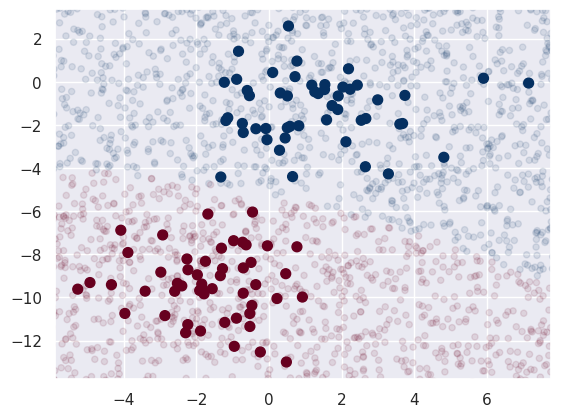

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Podemos ver claramente um limite ligeiramente curvado nas classificações - em geral, o limite em um Naïve Bayes gaussiano é quadrático.

Uma boa parte desse formalismo bayesiano é que ele naturalmente permite a classificação probabilística, que podemos então calcular usando o método `` predict_proba``:

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

As colunas fornecem as probabilidades posteriores do primeiro e do segundo rótulo, respectivamente.

Se você estiver procurando por estimativas de incerteza em sua classificação, abordagens bayesianas como essa podem ser úteis.

Obviamente, a classificação final só será tão boa quanto as suposições do modelo que levaram a tal classificação, razão pela qual o Naïve Bayes gaussiano frequentemente não produz resultados muito bons.

Ainda assim, em muitos casos - especialmente quando o número de recursos se torna grande -, essa suposição não é prejudicial o suficiente para impedir que o Naïve Bayes gaussiano seja um método útil.


## Naïve Bayes Multinomial

A suposição gaussiana descrita acima não é, de forma alguma, a única suposição simples que poderia ser usada para especificar a distribuição generativa de cada rótulo. Outro exemplo útil é Naïve Bayes multinomial, onde se supõe que os recursos sejam gerados a partir de uma distribuição multinomial simples.

A distribuição multinomial descreve a probabilidade de se observar contagens entre várias categorias e, portanto, um Naïve Bayes multinomial é mais apropriado para recursos que representam contagens ou taxas de contagem.

A idéia é então exatamente a mesma de antes, exceto que, ao invés de se modelar a distribuição de dados com o Gaussiano mais adequado, modelamos a distribuição de dados com uma distribuição multinomial mais adequada.

### Exemplo: Classificação Textual

Uma área onde Naïve Bayes multinomial é frequentemente usado é na classificação de texto, onde os recursos estão relacionados à contagem ou frequência de palavras nos documentos a serem classificados. Neste exemplo usaremos os recursos de contagem de palavras esparsas do corpus 20 Newsgroups para mostrar como podemos classificar esses breves documentos em categorias.

Vamos baixar os dados e dar uma olhada nos nomes de destino:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Tendo em vista a simplificação do exemplo, selecionaremos apenas algumas dessas categorias e faremos o download do conjunto de treinamento e teste:

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics', 'rec.autos', 'rec.motorcycles']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Aqui verificamos então uma entrada representativa de nossos dados:


In [ ]:
print(train.data[25])

From: maverick@wpi.WPI.EDU (T. Giaquinto)
Subject: General Information Request
Organization: Worcester Polytechnic Institute, Worcester, MA 01609-2280
Lines: 11
NNTP-Posting-Host: wpi.wpi.edu


	I am looking for any information about the space program.
This includes NASA, the shuttles, history, anything!  I would like to
know if anyone could suggest books, periodicals, even ftp sites for a
novice who is interested in the space program.



					Todd Giaquinto
					maverick@wpi.WPI.EDU
					



Para usarmos esses dados em uma tarefa de aprendizagem de máquina precisamos converter o conteúdo de cada string em um vetor de números. Para isso, usamos o vetorizador TF-IDF e criamos então um pipeline que o anexa a um classificador NB multinomial:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

A partir desse pipeline podemos então aplicar o modelo aos dados de treinamento e prever rótulos para os dados de teste:

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Agora que previmos os rótulos para os dados de teste, podemos avaliá-los para aprender sobre o desempenho do estimador.

Por exemplo, aqui está a matriz de confusão entre os rótulos verdadeiro e previsto para os dados de teste:

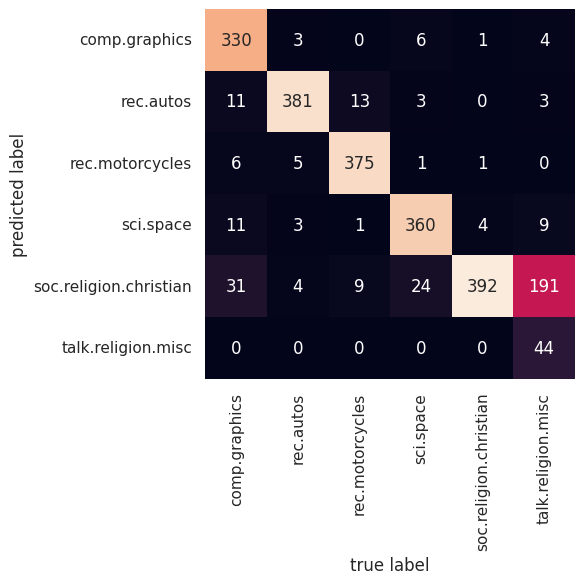

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Percebam que mesmo esse classificador muito simples pode separar com sucesso conversas sobre os assuntos "espaço", "computação gráfica", "motocicletas" e "automõveis", entretanto, apresneta certa "confusão" ao separar tópicos entre conversa sobre "religião" e conversa sobre "cristianismo".

O mais interessante aqui é que agora temos as ferramentas para determinar a categoria para *qualquer* string, usando o método `` predict () `` deste pipeline.

Aqui está uma função rápida que retornará a previsão para uma única sequência:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Vamos testá-la?

In [ ]:
predict_category('sending a probe to space')

'sci.space'

In [ ]:
predict_category('islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('pixel resolution')

'comp.graphics'

In [ ]:
predict_category('harley davidson fat boy')

'rec.motorcycles'

In [ ]:
predict_category('jeep military vehicle')

'rec.autos'

In [ ]:
# Espaço para que testem algumas entradas diferentes, como visto em sala.

Lembrem-se de que o que fizemos aqui nesse exemplo não é nada mais sofisticado do que um modelo de probabilidade simples para a frequência (ponderada) de cada palavra na string; no entanto, o resultado é deveras impressionante. Mesmo um algoritmo muito ingênuo, quando usado com cuidado e treinado em um grande conjunto de dados de alta dimensionalidade, pode ser surpreendentemente eficaz.

## Quando usar?

Como os classificadores NB fazem tais suposições rigorosas sobre os dados, eles geralmente não têm um desempenho tão bom quanto um modelo mais complicado. Dito isto, eles têm várias vantagens:

- Eles são extremamente rápidos para ambos, treinamento e predição;
- Eles fornecem previsão probabilística direta;
- Eles são, frequentemente, muito facilmente interpretáveis;
- Eles têm muito poucos (se houverem) parâmetros ajustáveis.

Essas vantagens significam que um classificador NB geralmente é uma boa escolha como classificação inicial para construção de um baseline, ou seja:

Se funcionar adequadamente, parabéns: você tem um classificador muito rápido e muito interpretável para o seu problema. Se não funcionar bem, você poderá começar a explorar modelos mais sofisticados, com algum conhecimento básico sobre o desempenho deles.

Os classificadores Naive Bayes tendem a ter um desempenho especialmente bom em uma das seguintes situações:

- Quando as suposições ingênuas realmente coincidem com os dados (na prática isso é raro!);
- Para categorias muito bem separadas, quando a complexidade do modelo é menos importante;
- Para dados de alta dimensionalidade, quando a complexidade do modelo é menos importante.

Os dois últimos pontos parecem distintos, mas na verdade não o são e estão relacionados: à medida que a dimensão de um conjunto de dados aumenta, é muito menos provável que dois pontos sejam encontrados em proximidade (afinal, eles devem estar próximos em *todas as dimensões* para estarem próximos no geral).

Isso significa que os clusters em dimensões altas tendem a ser mais separados, em média, do que os clusters em dimensões baixas, assumindo que as novas dimensões realmente adicionem informações. Por esse motivo, classificadores simplistas como o NB tendem a funcionar tão bem ou melhor que classificadores mais complicados quando a dimensionalidade aumenta: uma vez que você tem dados suficientes, mesmo um modelo simples pode ser muito poderoso!